## Esercitazione 5  del    18 Marzo 2025


In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

1.9073486328125e-06


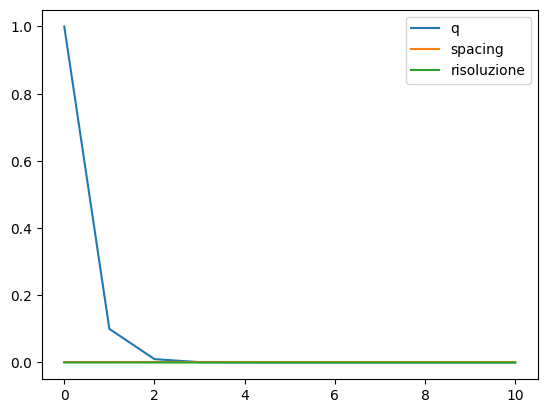

[1.e-06 1.e-07 1.e-08 1.e-09 1.e-10]
[4.99999442e-06 5.00003807e-07 5.00003807e-08 4.99130692e-09
 4.94765118e-10 4.36557457e-11 1.45519152e-11 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[5.e-06 5.e-07 5.e-08 5.e-09 5.e-10 5.e-11 5.e-12 5.e-13 5.e-14 5.e-15
 5.e-16]


In [28]:
# Problema ben condizionato SE E SOLO SE errore relativo piccolo

p = 10.0**5
q = 10.0**(-np.arange(11.0))

# Algoritmo risolutivo
psi_x = -p + np.sqrt(p**2 + q)
spacing_in_p_squared = np.spacing(p**2)
print(spacing_in_p_squared)

x = np.arange(11)
plt.plot(x, q)
plt.plot(x, np.array(np.repeat(spacing_in_p_squared, 11)))
plt.plot(x, psi_x)
plt.legend(["q", "spacing", "risoluzione"])
plt.show()
print(q[q < spacing_in_p_squared])
print(psi_x)

stable_psi_x = q/(p + np.sqrt(p**2 + q))
print(stable_psi_x)

# Esercizio 2

Si stabilisca se il problema relativo al calcolo della funzione $f(x)= \frac  {(1+x)-1 }  {x }$ per $x= 10^{-i }$ $  i=1,2,...,20$  risulta essere ben
condizionato per tutti i valori di x assegnati; verificare sperimentalmente la stabilità numerica dell'algoritmo di valutazione

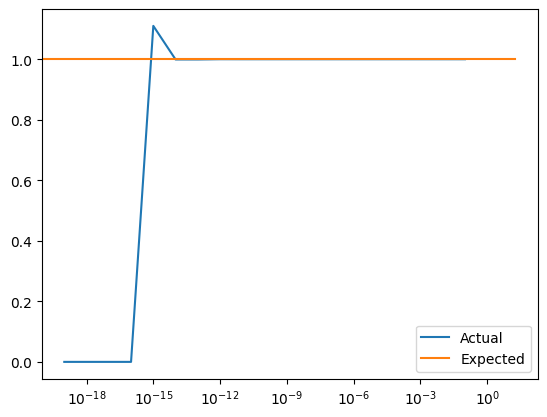

[1.         1.         1.         0.99999999 0.99920072 0.99920072
 0.         0.         0.         0.        ]


In [ ]:
def f(x):
    return ((1+x)-1)/x

x = 10.0**(-np.arange(start=1, stop=20))
actual = f(x)
expected = np.ones_like(f(x))
plt.semilogx(x, actual, expected)
plt.legend(["Actual", "Expected"])
plt.show()
print(actual[actual < expected])

## Esercizio 3

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata.
- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

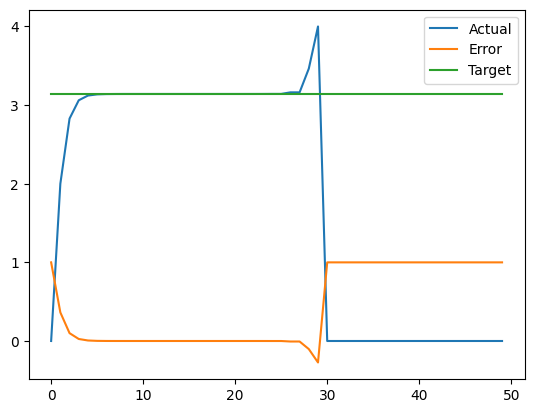

In [ ]:
import math

n = 50
b = np.zeros((n,))
s = np.zeros((n,))
p = np.zeros((n,))
errors = np.zeros((n,))
target = p + math.pi

b[0] = 2
s[0] = 1
errors[0] = (math.pi - p[0])/math.pi

for i in range(1,n):
    p[i] = b[i-1] * s[i-1]
    b[i] = 2 * b[i-1]
    s[i] = math.sqrt((1.0 - math.sqrt(1.0 - s[i-1]**2)) / 2.0)
    errors[i] = (math.pi - p[i])/math.pi

plt.plot(range(n), p)
plt.plot(range(n), errors)
plt.plot(range(n), target)
plt.legend(["Actual", "Error", "Target"])
plt.show()

# L'algoritmo non è stabile: dall'iterazione 30 in poi il valore approssimato di PI greco si distanzia
# notevolmente dal valore reale.

# Come lo si trova stabile?? Boooh

## Esercizio 4   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



[ 3.28431686e-13  7.48804501e-14  4.95571466e-14 -1.15235512e-14
  1.79717352e-15 -1.43982049e-15 -2.63677968e-16 -4.16333634e-17
 -5.55111512e-17 -1.11022302e-16  0.00000000e+00 -4.44089210e-16
  1.77635684e-15  7.10542736e-15 -2.84217094e-14  2.84217094e-14
  0.00000000e+00  6.82121026e-13  4.54747351e-13  0.00000000e+00
  7.27595761e-12]


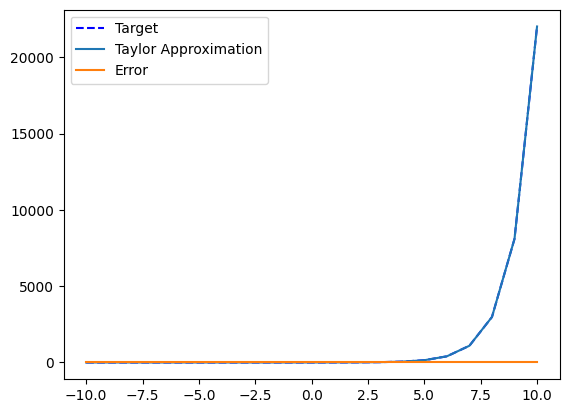

In [10]:
N = 100
ncamp = 21
def taylor_exp(x):
    fact_cache = {}
    def fact(n):
        if (n in fact_cache):
            return fact_cache.get(n)
        if (n == 0 or n == 1):
            return 1
        res = n * fact(n - 1)
        fact_cache[n] = res
        return res

    out = np.zeros((ncamp,))
    for idx, x0 in enumerate(x):
        sum = 0
        for k in range(N):
            sum += x0**k / fact(k)
        out[idx] = sum
    return out

exp_approx_values = np.zeros((ncamp,))
target_exp = lambda x: np.exp(x)
x = np.linspace(-10, 10, ncamp)

print(target_exp(x) - taylor_exp(x))

errors = (target_exp(x) - taylor_exp(x)) / target_exp(x)
plt.plot(x, target_exp(x), "b--")
plt.plot(x, taylor_exp(x))
plt.plot(x, errors)
plt.legend(["Target", "Taylor Approximation", "Error"])
plt.show()

# Ma è già stabile!!

## Esercizio 5
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

[2.22044605e-016 1.38777878e-017 1.73472348e-018 2.16840434e-019
 1.35525272e-020 1.69406589e-021 2.11758237e-022 1.32348898e-023
 1.65436123e-024 2.06795153e-025 1.29246971e-026 1.61558713e-027
 2.01948392e-028 1.26217745e-029 1.57772181e-030 1.97215226e-031
 1.23259516e-032 1.54074396e-033 1.92592994e-034 1.20370622e-035
 1.50463277e-036 1.88079096e-037 1.17549435e-038 1.46936794e-039
 1.83670992e-040 1.14794370e-041 1.43492963e-042 1.79366203e-043
 1.12103877e-044 1.40129846e-045 1.75162308e-046 2.18952885e-047
 1.36845553e-048 1.71056941e-049 2.13821177e-050 1.33638236e-051
 1.67047794e-052 2.08809743e-053 1.30506089e-054 1.63132612e-055
 2.03915765e-056 1.27447353e-057 1.59309191e-058 1.99136489e-059
 1.24460306e-060 1.55575382e-061 1.94469227e-062 1.21543267e-063
 1.51929084e-064 1.89911355e-065 1.18694597e-066 1.48368246e-067
 1.85460308e-068 1.15912692e-069 1.44890865e-070 1.81113582e-071
 1.13195988e-072 1.41494986e-073 1.76868732e-074 2.21085915e-075
 1.38178697e-076 1.727233

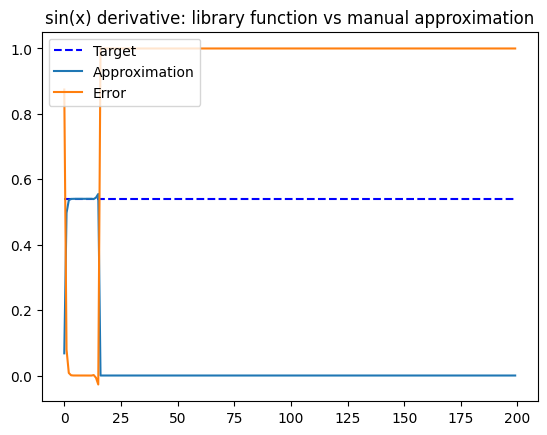

In [134]:
c = 1
exact_der = lambda x: math.cos(x)
x_max = 200.0

def incremental_ratio(x):
    h = 10.0**(-np.arange(x_max))
    spacing = np.spacing(h)
    print(spacing)
    return (np.sin(x + h) - np.sin(x)) / h

rel_error = (exact_der(c) - incremental_ratio(c)) / exact_der(c)

x_range = np.arange(x_max)
plt.plot(x_range, np.full_like(x_range, exact_der(c)), "b--")
plt.plot(x_range, incremental_ratio(c))
plt.plot(x_range, rel_error)
plt.title("sin(x) derivative: library function vs manual approximation")
plt.legend(["Target", "Approximation", "Error"])
plt.show()

# Algoritmo non stabile! Dopo l'iterato 20 (circa — dedotto dal grafico), 
# h assume valori troppo più piccoli dello spacing — andando a perdere informazioni

## Esercizio 6
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


In [7]:
from time import perf_counter

def ruffini_horner(coeff, x):
    n = len(coeff)
    p = coeff[-1]
    for i in range(1, n):
        p = coeff[(n - 1) - i] + p * x
    return p

def default_evaluation(coeff, x):
    n = len(coeff)
    p = coeff[0]
    r = 1
    for i in range(1, n):
        r *= x
        p += coeff[i] * r
    return p

p1 = np.array([ 1, -16, 112, -448, 1120, -1792, -1024, 256 ])
p2 = np.array([ 1, 0, -8, 0, 0, 1, 0, -7, 12, 0, -4, 1 ])

points_count = 1_000_000
x1 = np.linspace(1.8, 2.2, points_count)
x2 = np.linspace(-5, 5, points_count)

result_ruffini = np.empty((points_count,))
result_default = np.empty((points_count,))

start = perf_counter()
for i, x0 in enumerate(x1):
    result_ruffini[i] = ruffini_horner(p1, x0)
elapsedRuffini = perf_counter() - start
print(f"{result_ruffini} calculated with Ruffini-Horner method in {elapsedRuffini}ms")

start = perf_counter()
for i, x0 in enumerate(x1):
    result_default[i] = default_evaluation(p1, x0)
elapsedDefault = perf_counter() - start 
print(f"{result_default} calculated with default algorithm in {elapsedDefault}ms")

print(f"Ruffini-Horner method is {(1 - elapsedRuffini/elapsedDefault) * 100}% faster than default algorithm.")

[ -43537.0871168   -43537.13793433  -43537.18875191 ... -122624.07185844
 -122624.18453078 -122624.2972032 ] calculated with Ruffini-Horner method in 1.5687102499650791ms
[ -43537.0871168   -43537.13793433  -43537.18875191 ... -122624.07185844
 -122624.18453078 -122624.2972032 ] calculated with default algorithm in 1.6838256670162082ms
Ruffini-Horner method is 6.836540106620248% faster than default algorithm.


## Esercizio 7
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?




Si nota che al restringersi dell'intervallo in torno al punto x=2, 
in cui la funzione si annulla, si evidenzia l'instabilità dell'algoritmo 1
rispetto all' algoritmo di Horner che risulta più stabile. 
